In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/cavpor_dnazoo/merge_peak_scores"
data_path = os.path.join(data_dir, "scores.tsv")



# Per-Peak Visualizations

Now, I look into the distributions of several metrics across individual mouse peaks.

In [3]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

chr_x   start_x     end_x                   1   2_x 3_x  \
0       HiC_scaffold_1     35734     35923        total_peak_1   362   .   
1       HiC_scaffold_1     65614     65919        total_peak_7   451   .   
2       HiC_scaffold_1    106547    106918        total_peak_9  1913   .   
3       HiC_scaffold_1    116919    117150       total_peak_12   112   .   
4       HiC_scaffold_1    127910    129282      total_peak_13a  4806   .   
...                ...       ...       ...                 ...   ...  ..   
536938  HiC_scaffold_9  73174620  73175225  total_peak_144152a  2355   .   
536939  HiC_scaffold_9  73174620  73175225  total_peak_144152b   741   .   
536940  HiC_scaffold_9  73242406  73243360  total_peak_144154a   258   .   
536941  HiC_scaffold_9  73242406  73243360  total_peak_144154b  2468   .   
536942  HiC_scaffold_9  73342825  73342981   total_peak_144156    68   .   

             4_x        5_x        6_x  summit_x  ...  contrib_counts_nlq  \
0        3.61945   36.21180   34.34910        86  ...            1.498311   
1        4.01287   45.14390   43.23530       143  ...                 inf   
2        8.76011  191.33300  189.06600       240  ...                 inf   
3        2.25560   11.27580    9.64009       122  ...                 inf   
4        4.58859  480.69000  478.10800       212  ...                 inf   
...          ...        ...        ...       ...  ...                 ...   
536938  24.59720  235.53200  231.13100       169  ...                 inf   
536939  11.22500   74.17340   71.02260       452  ...                 inf   
536940   4.72927   25.84980   23.17810       136  ...                 inf   
536941  18.79060  246.87400  242.36300       469  ...                 inf   
536942   4.62931    6.89175    4.73796        73  ...                 inf   

        contrib_counts_dist_pooled  ss_self_contrib_profiles_dist_mean  \
0                         1.107368                            0.907100   
1                         0.280359                            0.360584   
2                         0.236276                            0.362008   
3                         0.317825                            0.454620   
4                         0.299323                            0.316863   
...                            ...                                 ...   
536938                    0.298496                            0.438140   
536939                    0.298647                            0.438043   
536940                    0.352562                            0.412557   
536941                    0.352396                            0.412446   
536942                    0.863839                            0.868201   

        xs_self_contrib_profiles_dist_mean  cross_contrib_profiles_dist_mean  \
0                                 0.991240                          1.388531   
1                                 0.322262                          0.455063   
2                                 0.345499                          0.473879   
3                                 0.514189                          0.638558   
4                                 0.312376                          0.424904   
...                                    ...                               ...   
536938                            0.424598                          0.576426   
536939                            0.424607                          0.576447   
536940                            0.476366                          0.606572   
536941                            0.476122                          0.606343   
536942                            0.682335                          1.244690   

        contrib_profiles_e_dist  contrib_profiles_nlp  contrib_profiles_nlq  \
0                      0.937401              2.100371              2.086201   
1                      0.476739                   inf                   inf   
2                      0.490155                   inf                   inf   
3            

## Mean vs Variance per peak

Here, we look at the means and variances of divergence between species for each mouse peak.  

The x axis for each subplot is the difference of the predicted log10 counts from the GP models and the mouse models, averaged over 5 folds. A positive value indicates a greater prediction from the GP models relative to the mouse models.

The y axis is the estimated standard deviation across folds of the divergence between the two species' count outputs. A higher standard deviation indicates higher variances across folds.    
The color indicates the significance of the difference between species for each peak, as evaluated using the Mann-Whitney U test on quantile-normalized predictions. I also looked into using DESeq also but I its assumptions are geared towards observed counts from experimental data and aren't really appropiate for analyzing predicted counts from models (more below).

Here, we see basically no correlation between mean and variance, which directly contradicts with the assumptions made by DESeq. The exceptions are mCM-1-3, Other-2, and pCM-3, though these seem to be due to technical issues (more later).

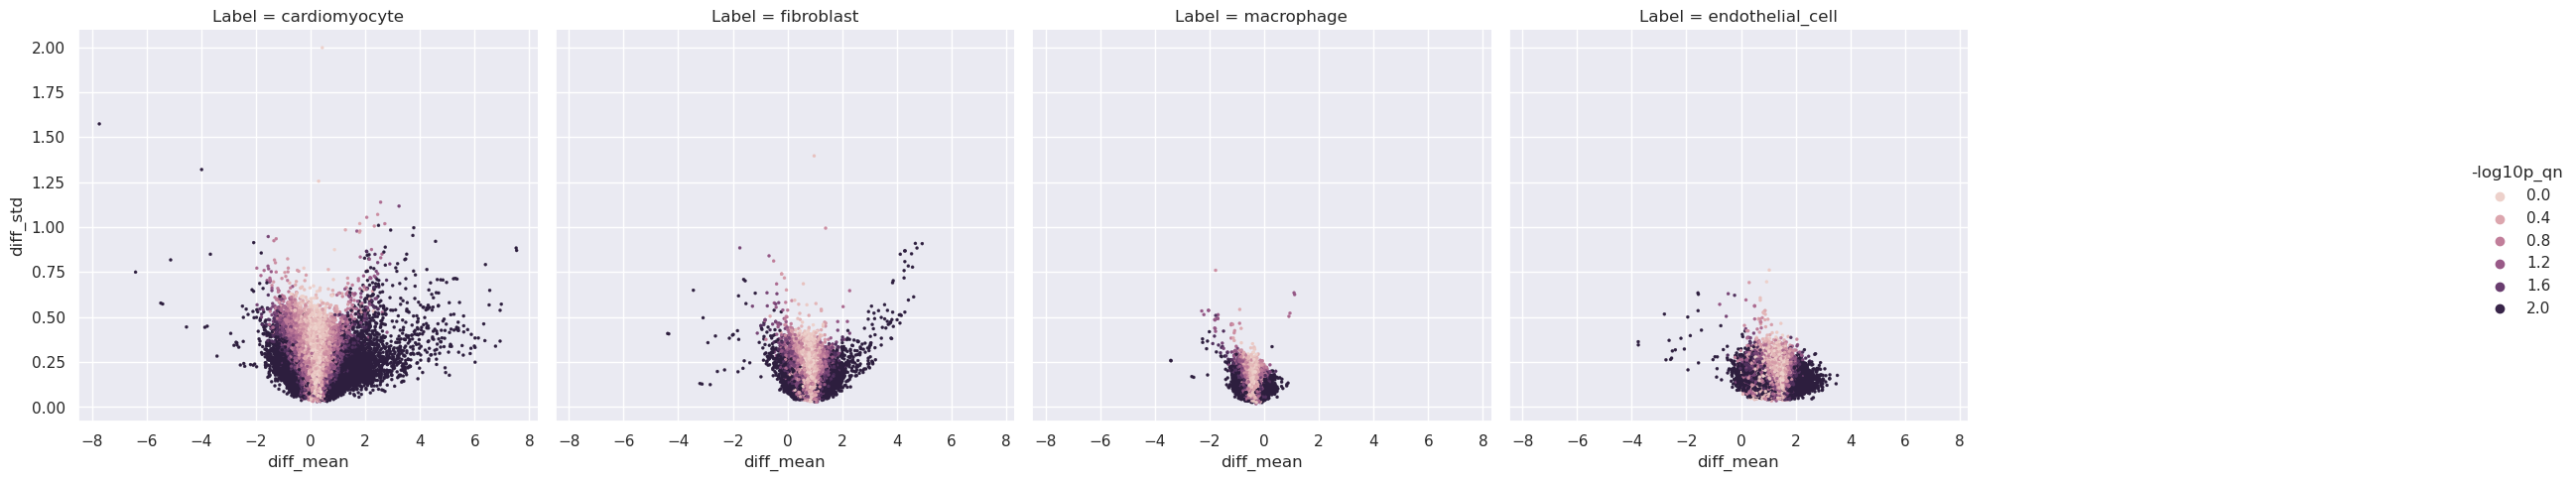

In [4]:
sns.relplot(data=data, x="diff_mean", y="diff_std", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Mouse vs. GP predictions

Next, we look at the mean predictions of the mouse and GP models on the mouse peaks.  

The x axis is the mean predicted log10 counts as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted log10 counts as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for some cell types, the slope is significantly different than 1 or even non-linear. I account for this when calculating significance by quantile-normalizing the predicted counts from each model. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

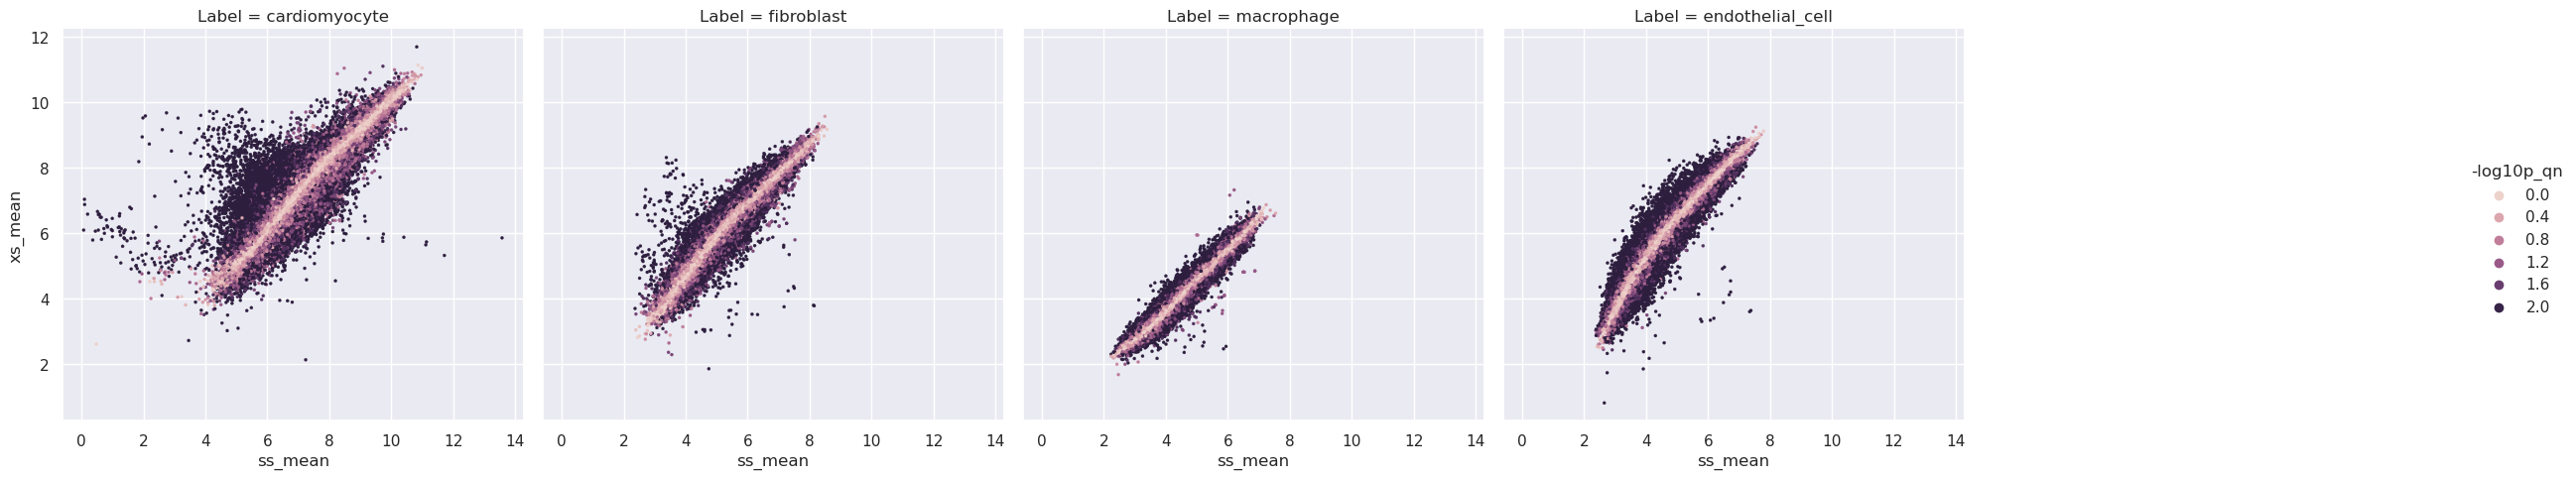

In [5]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

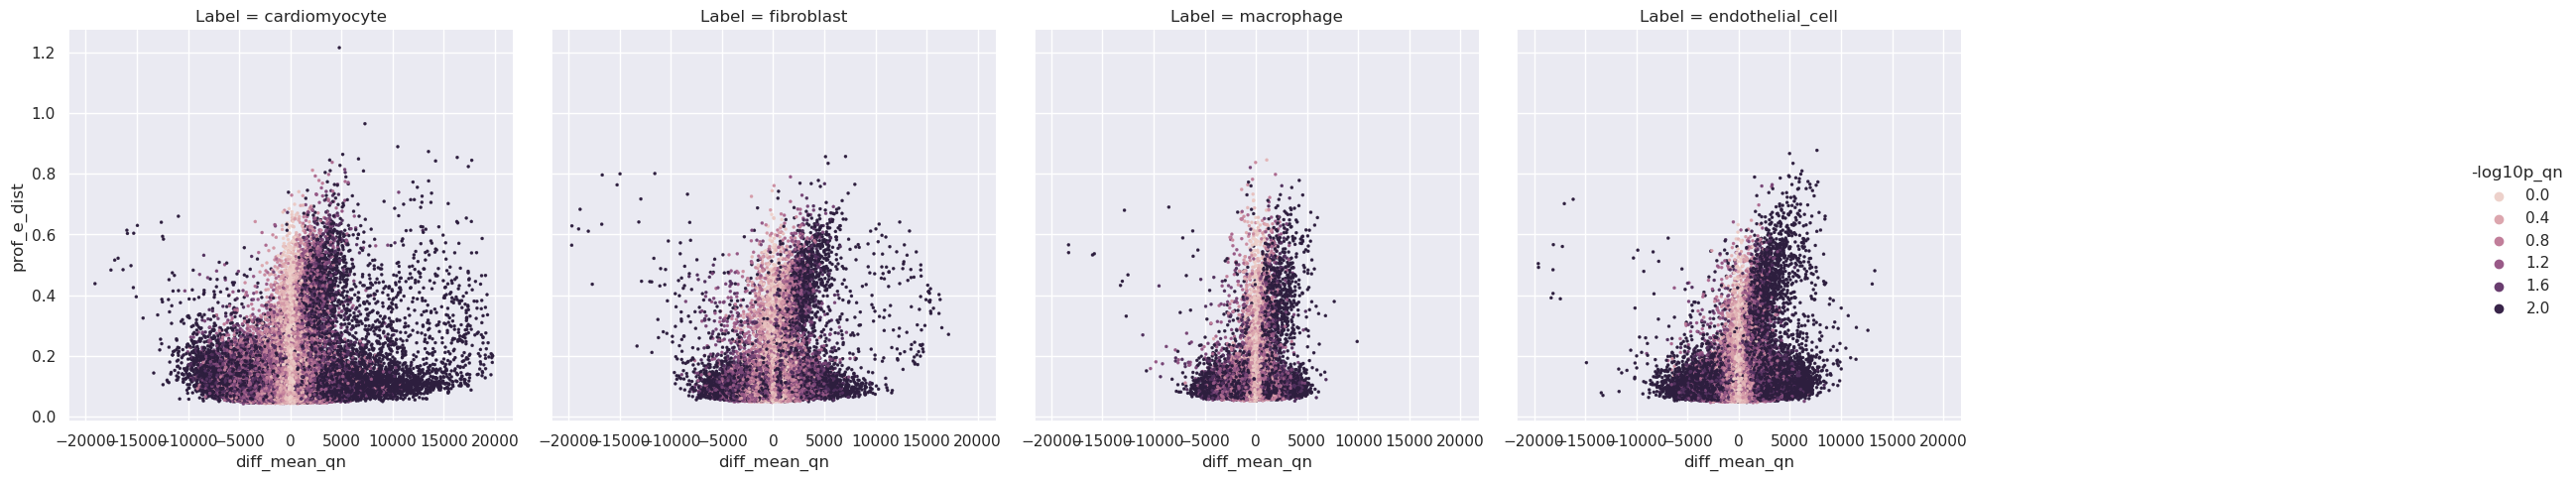

In [6]:
g = sns.relplot(data=data, x="diff_mean_qn", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

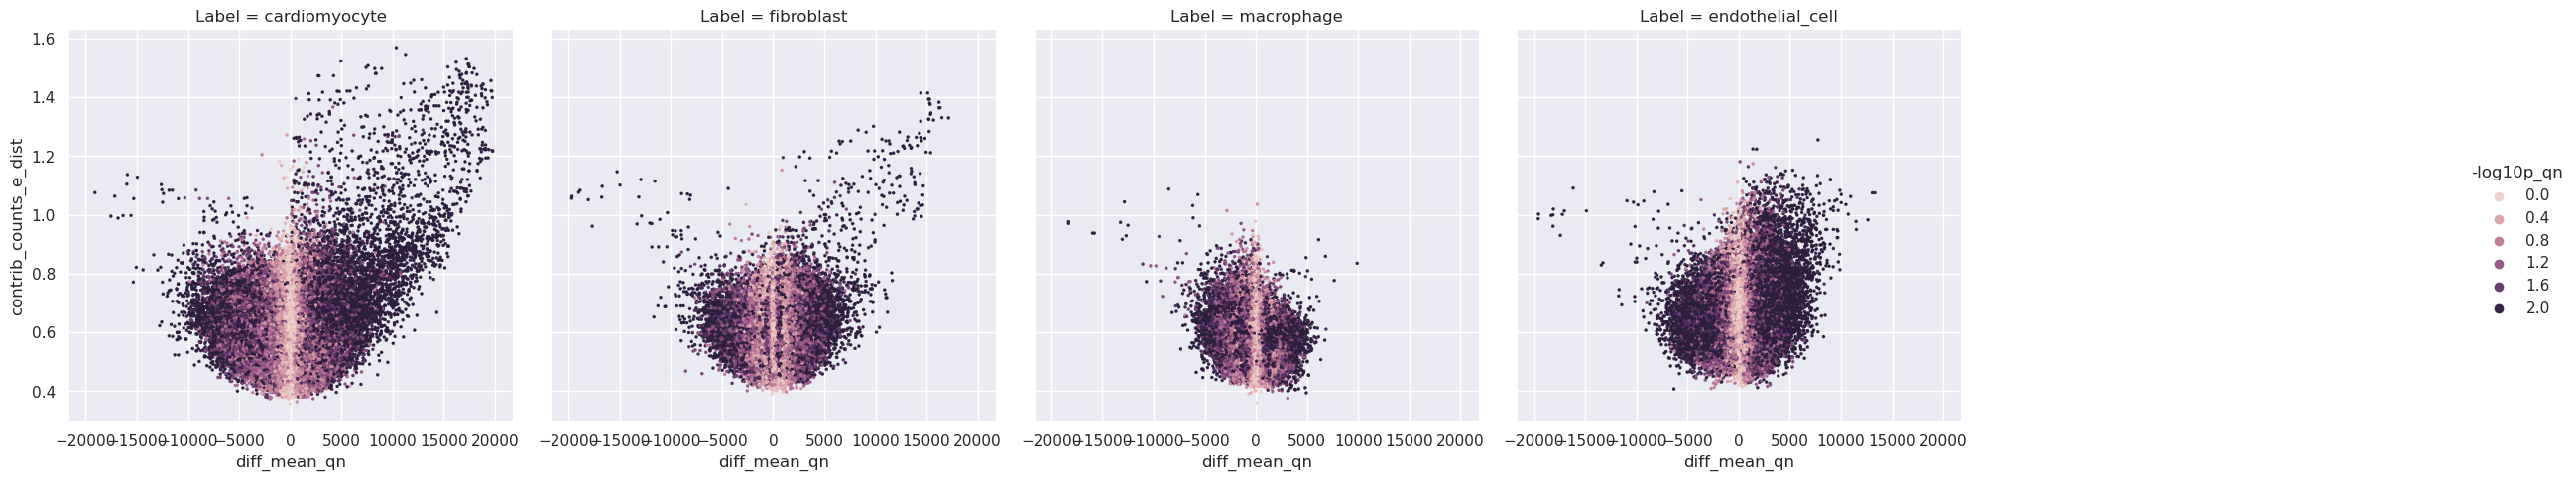

In [7]:
g = sns.relplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

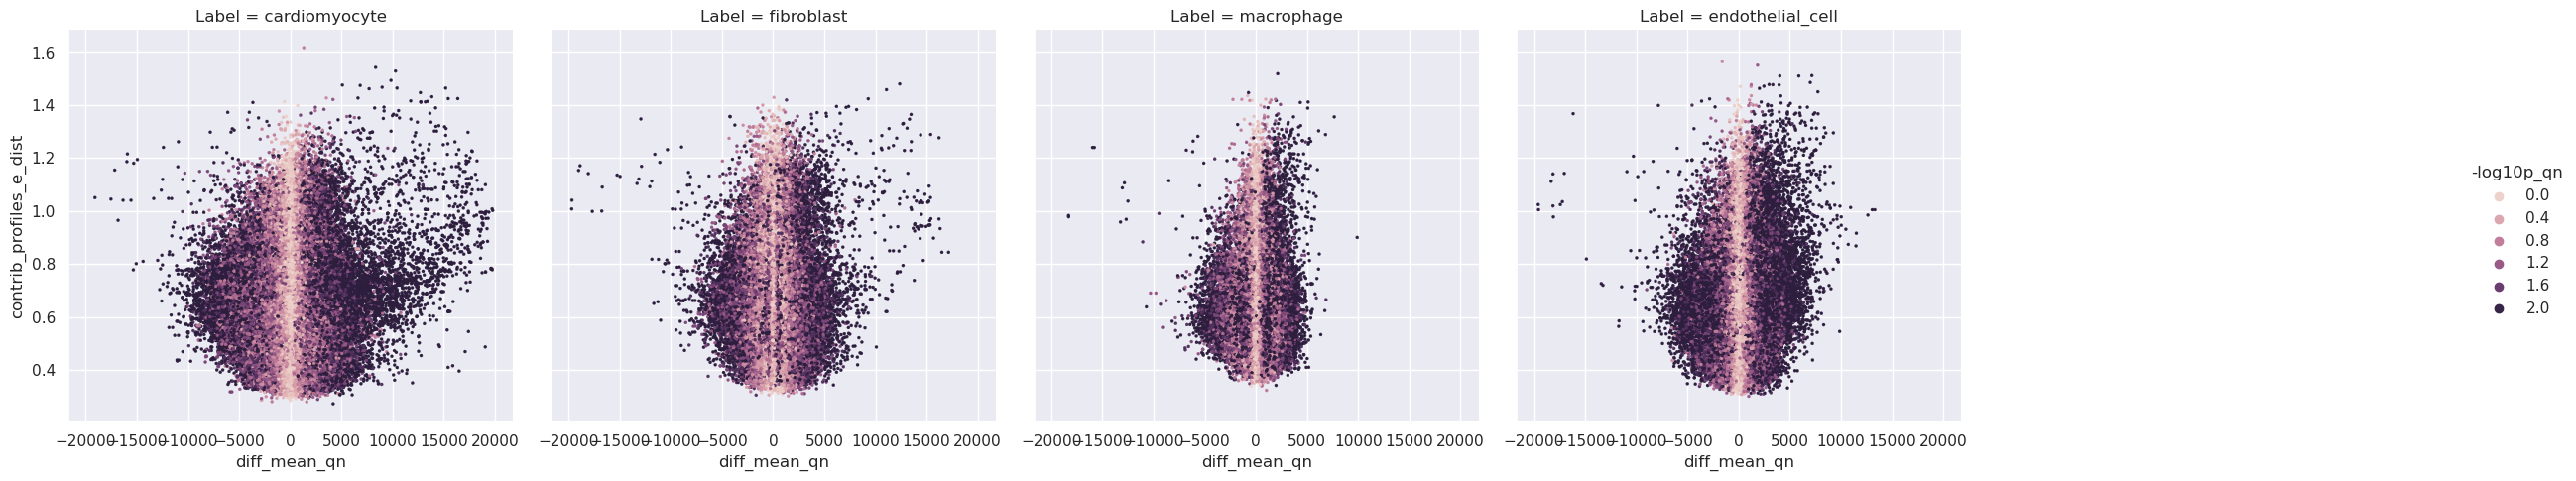

In [8]:
g = sns.relplot(data=data, x="diff_mean_qn", y="contrib_profiles_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

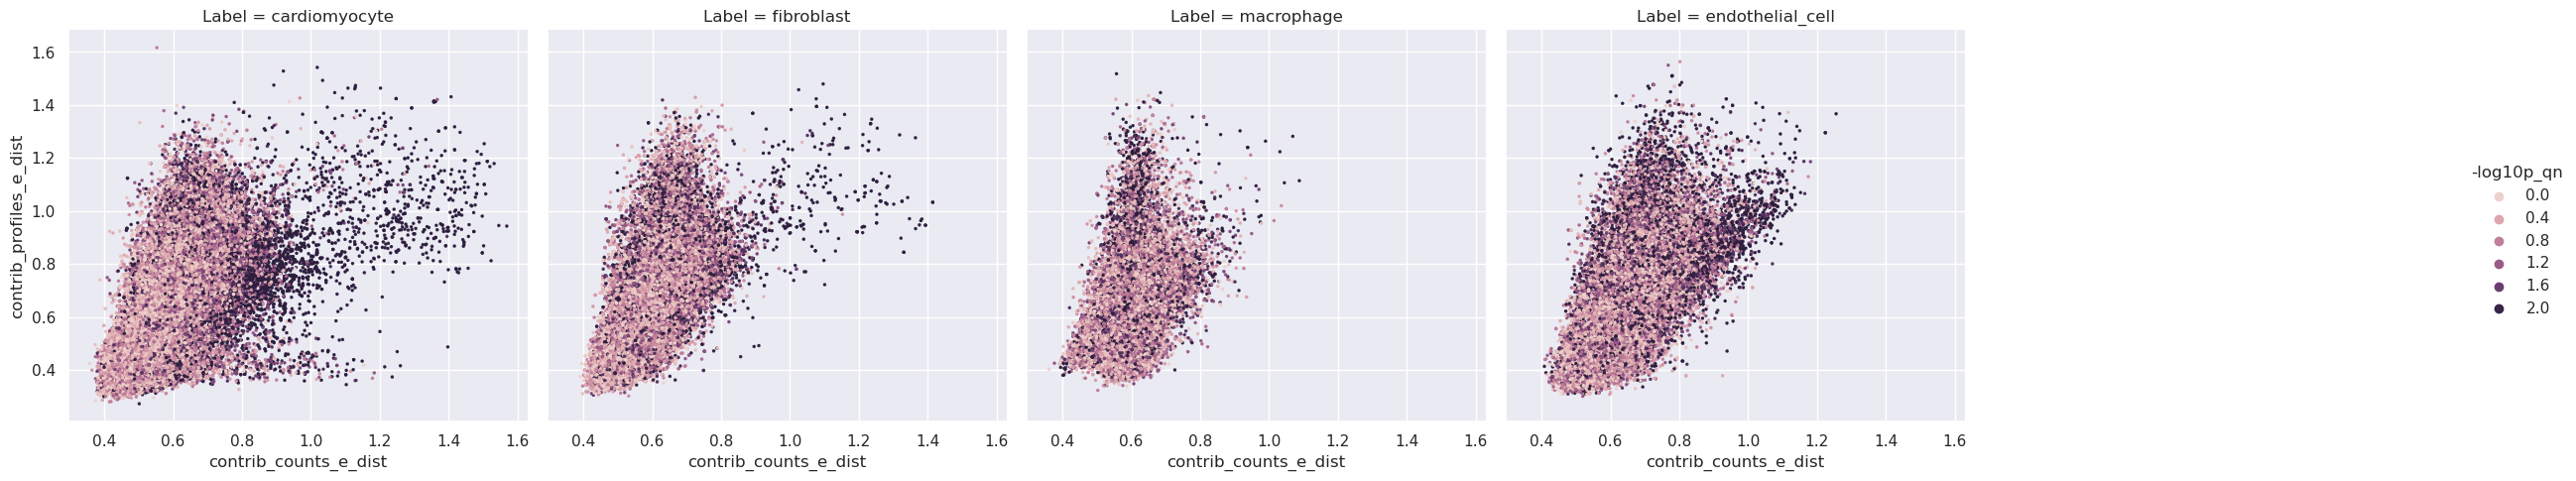

In [9]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="contrib_profiles_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

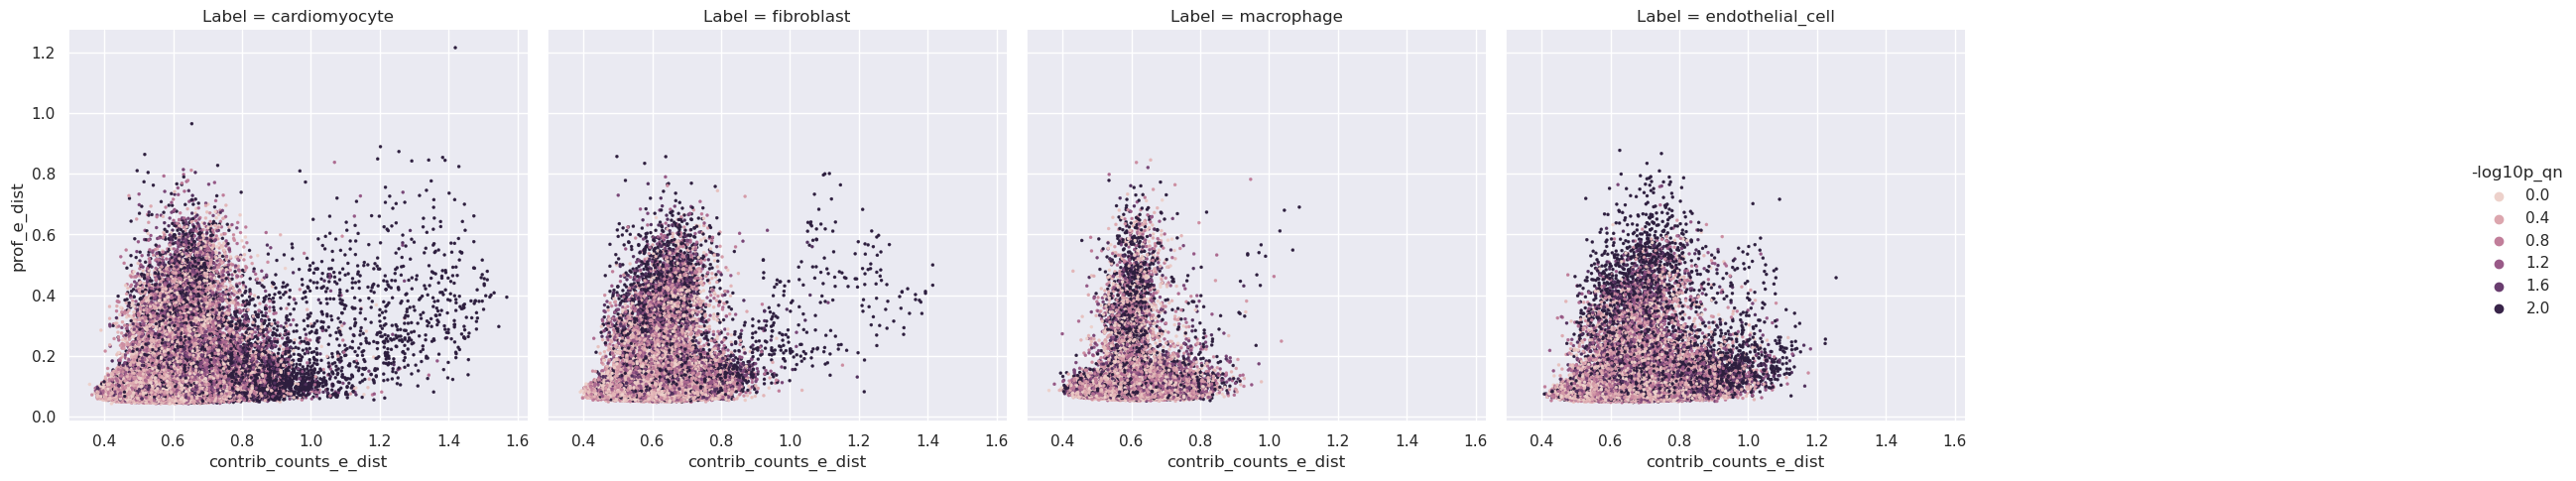

In [10]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

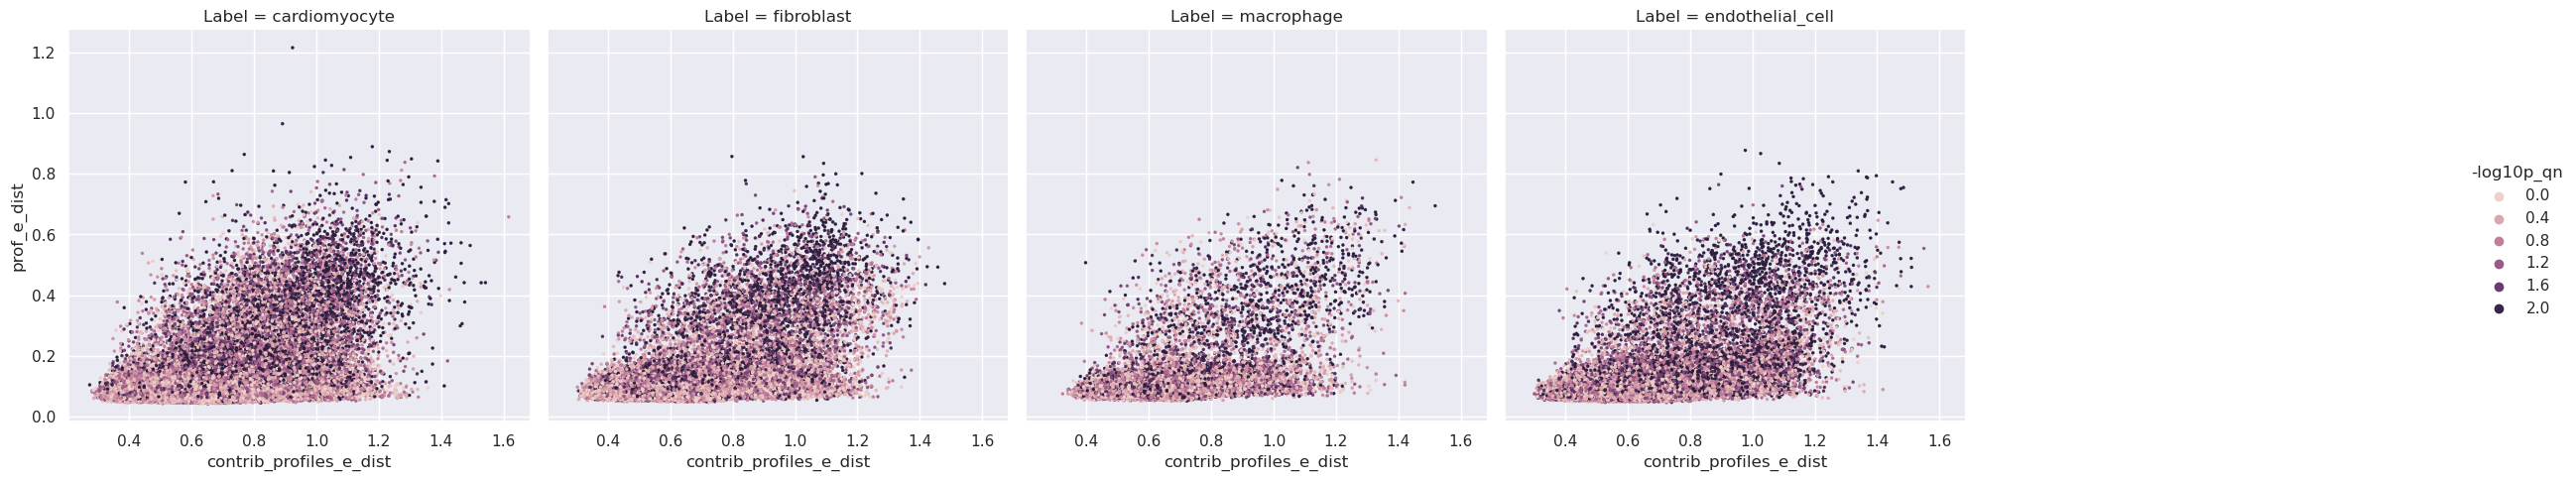

In [11]:
g = sns.relplot(data=data, x="contrib_profiles_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


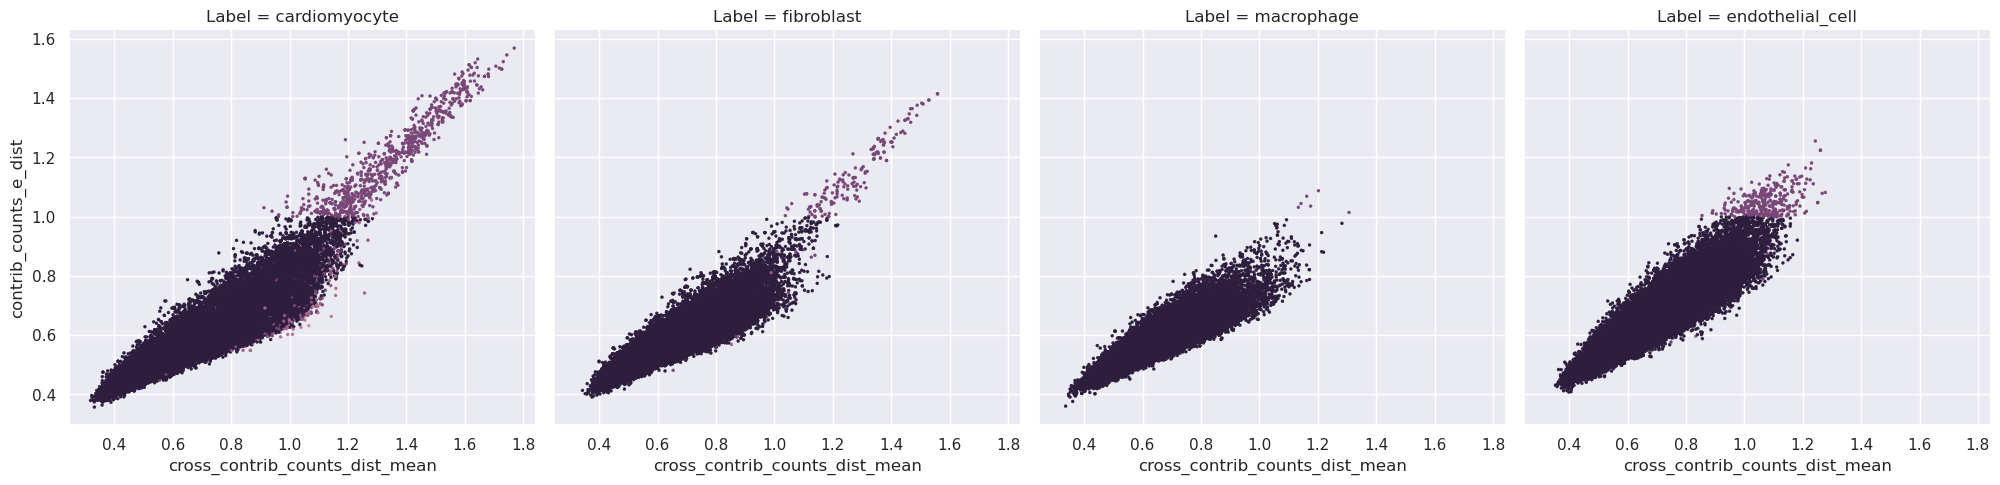

In [12]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="contrib_counts_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


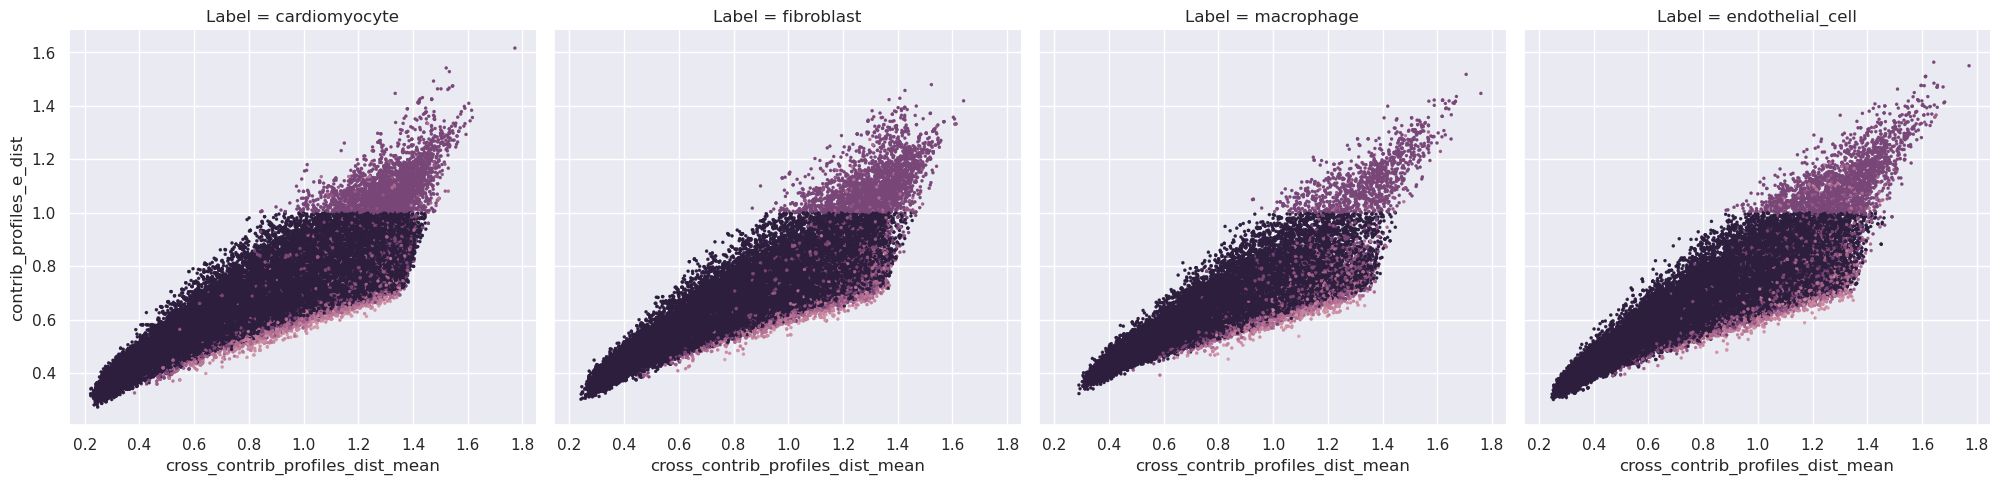

In [13]:
sns.relplot(data=data, x="cross_contrib_profiles_dist_mean", y="contrib_profiles_e_dist", col="Label", hue="contrib_profiles_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

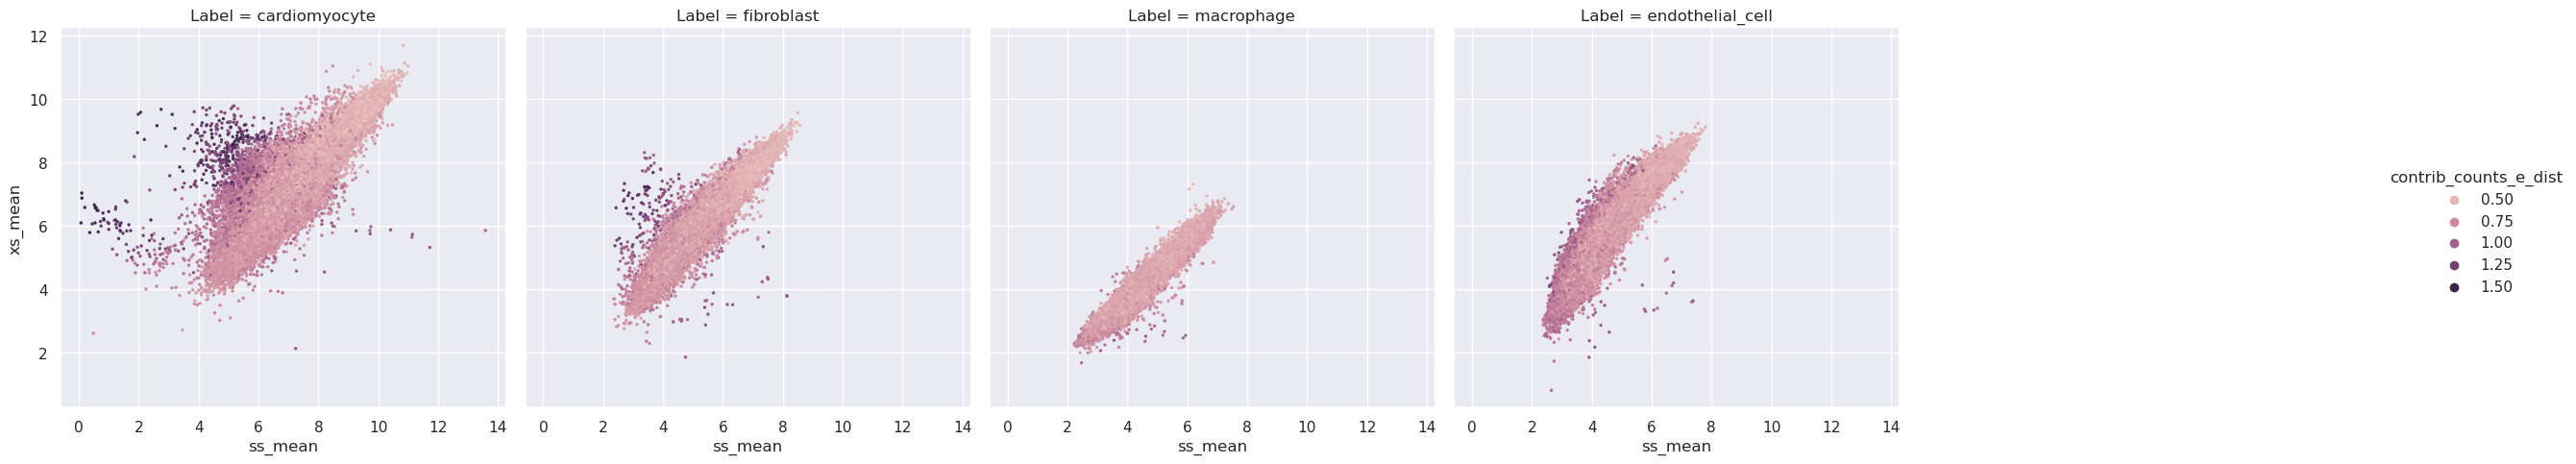

In [14]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_counts_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

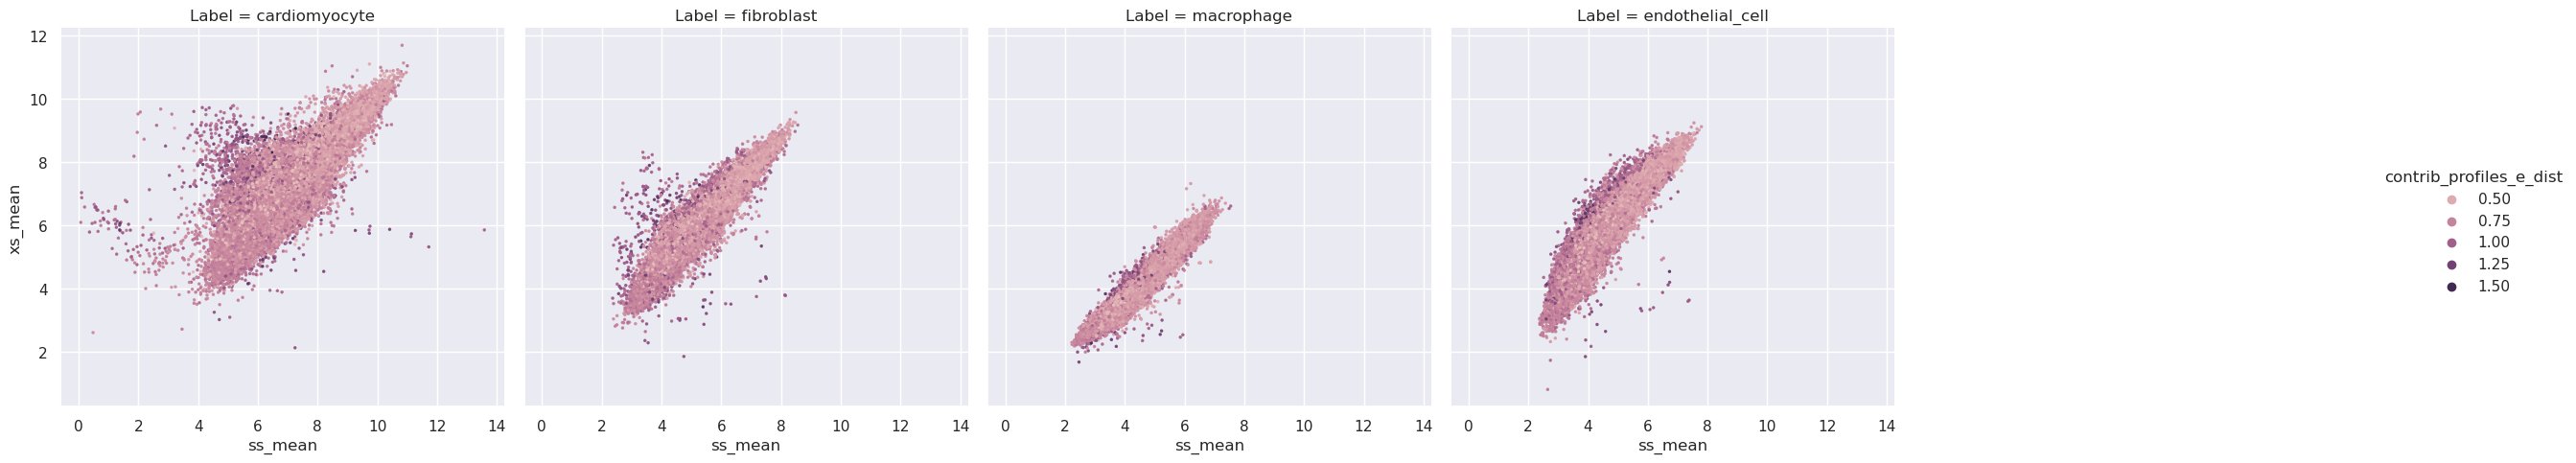

In [15]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_profiles_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

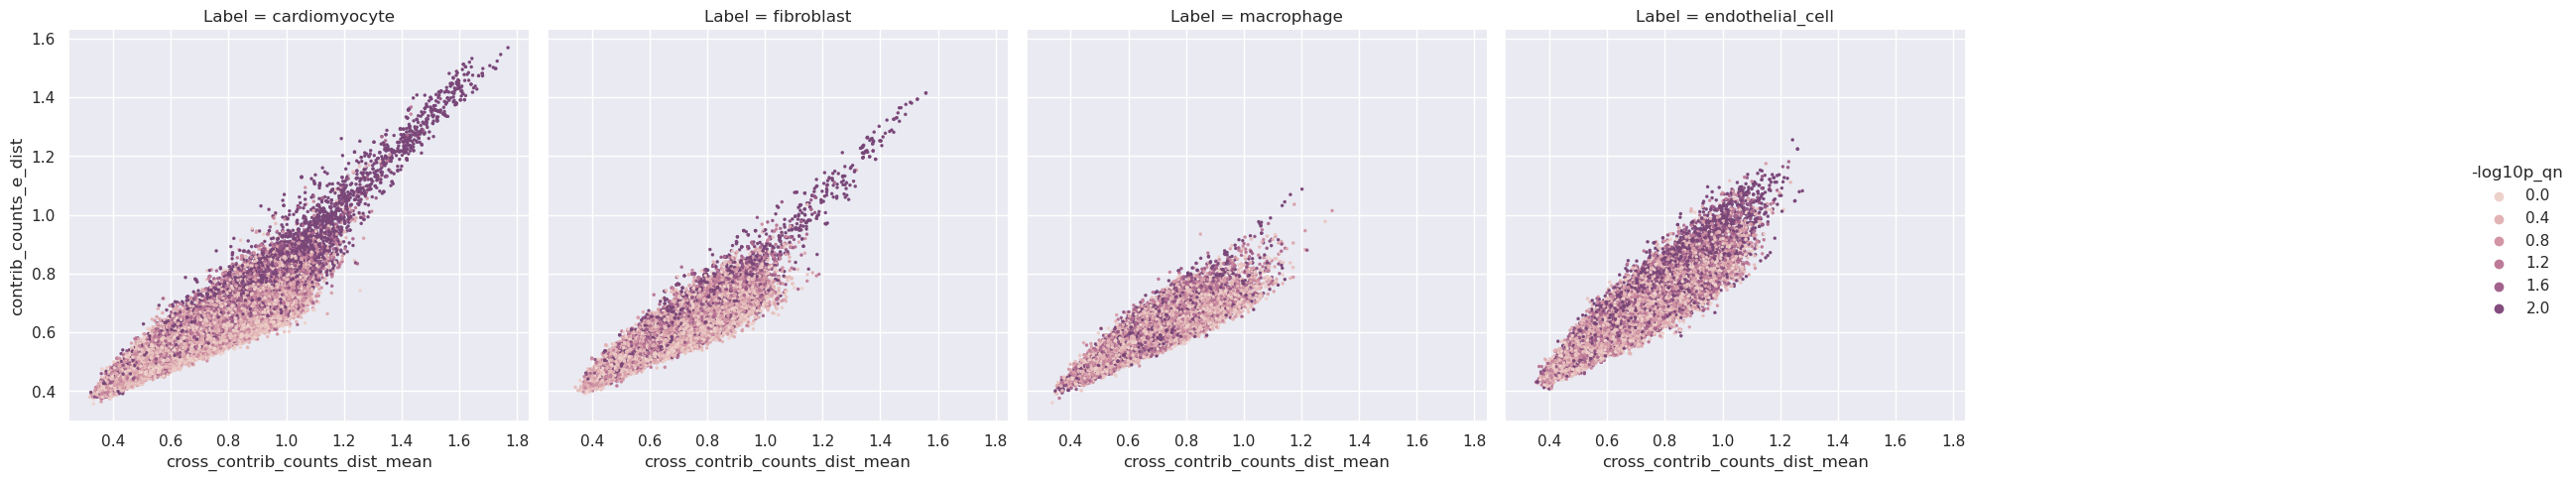

In [16]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="-log10p_qn", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

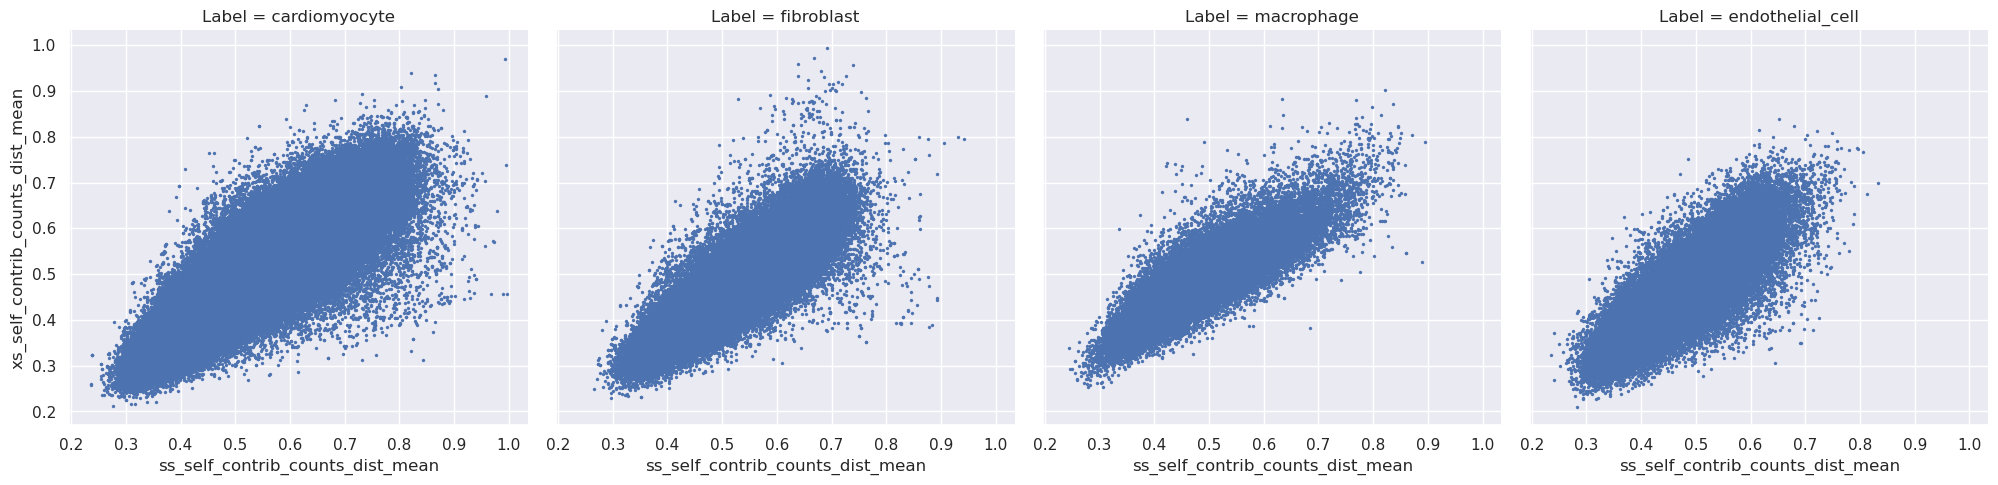

In [17]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


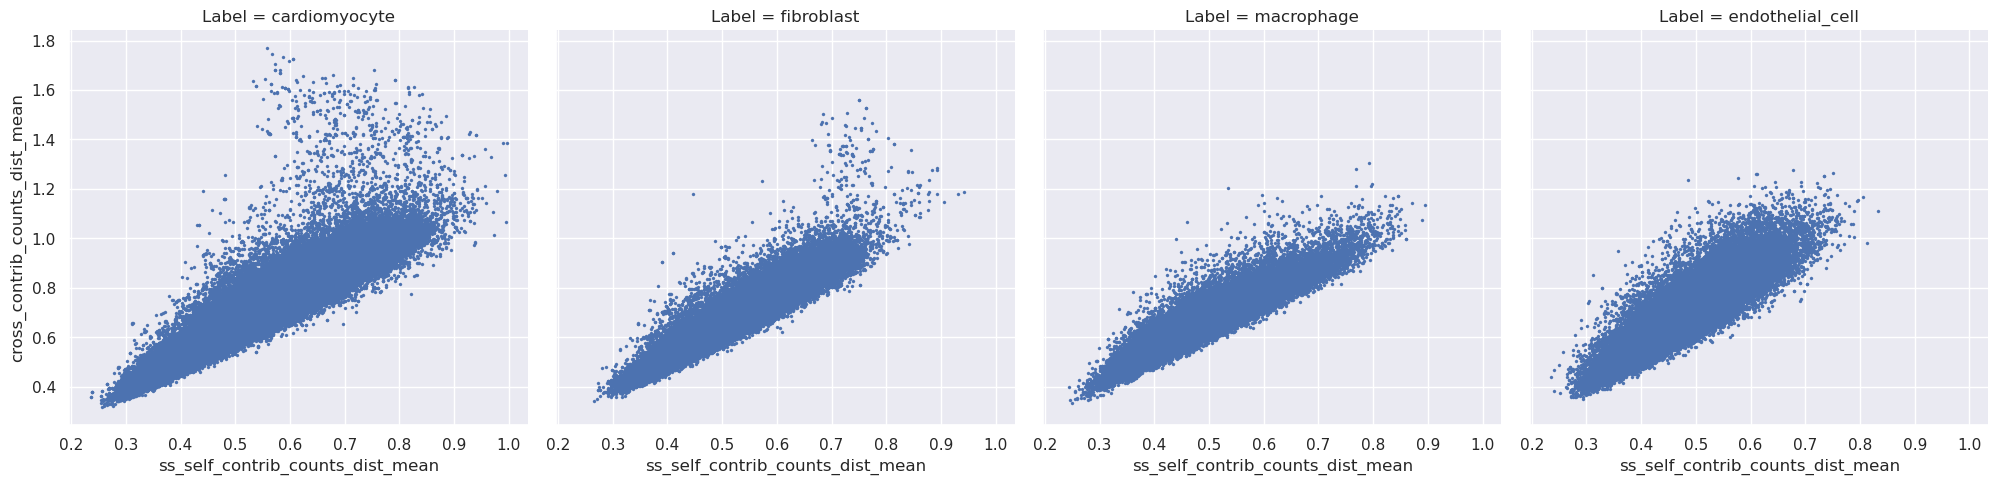

In [18]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="cross_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


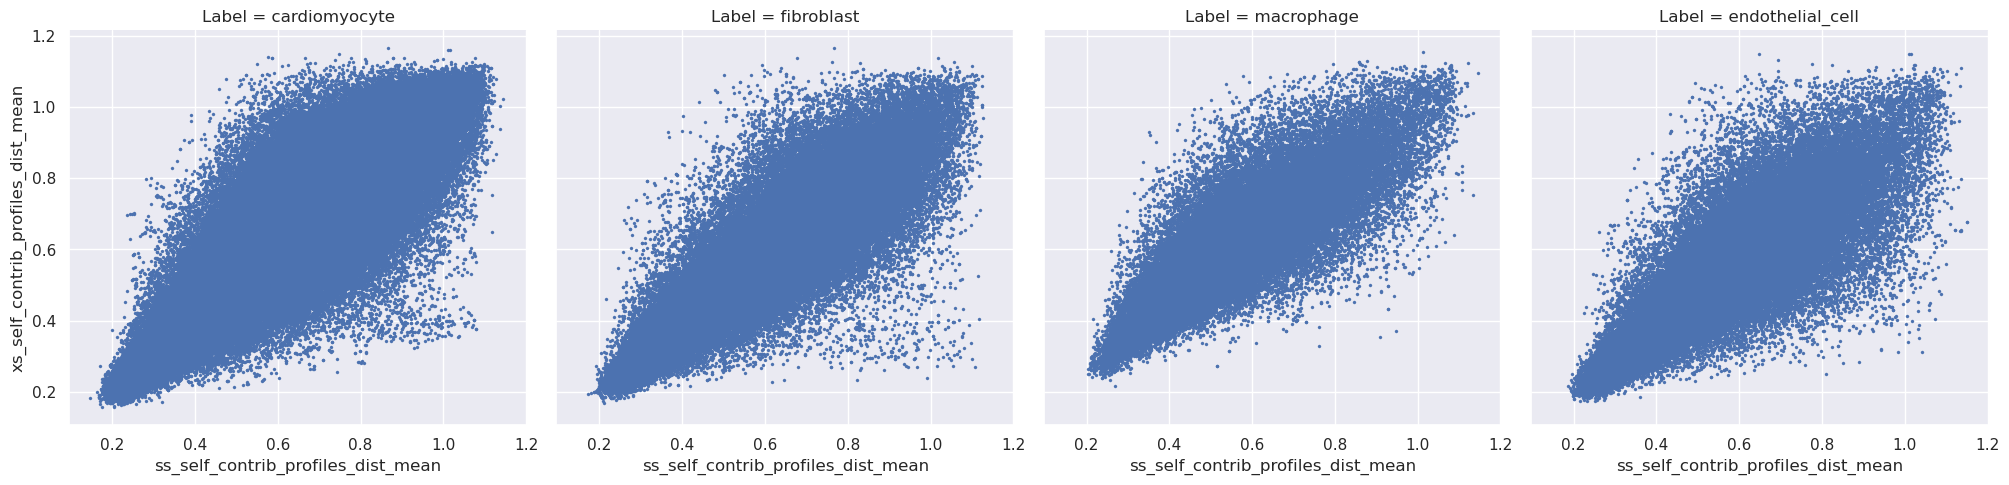

In [19]:
sns.relplot(data=data, x="ss_self_contrib_profiles_dist_mean", y="xs_self_contrib_profiles_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


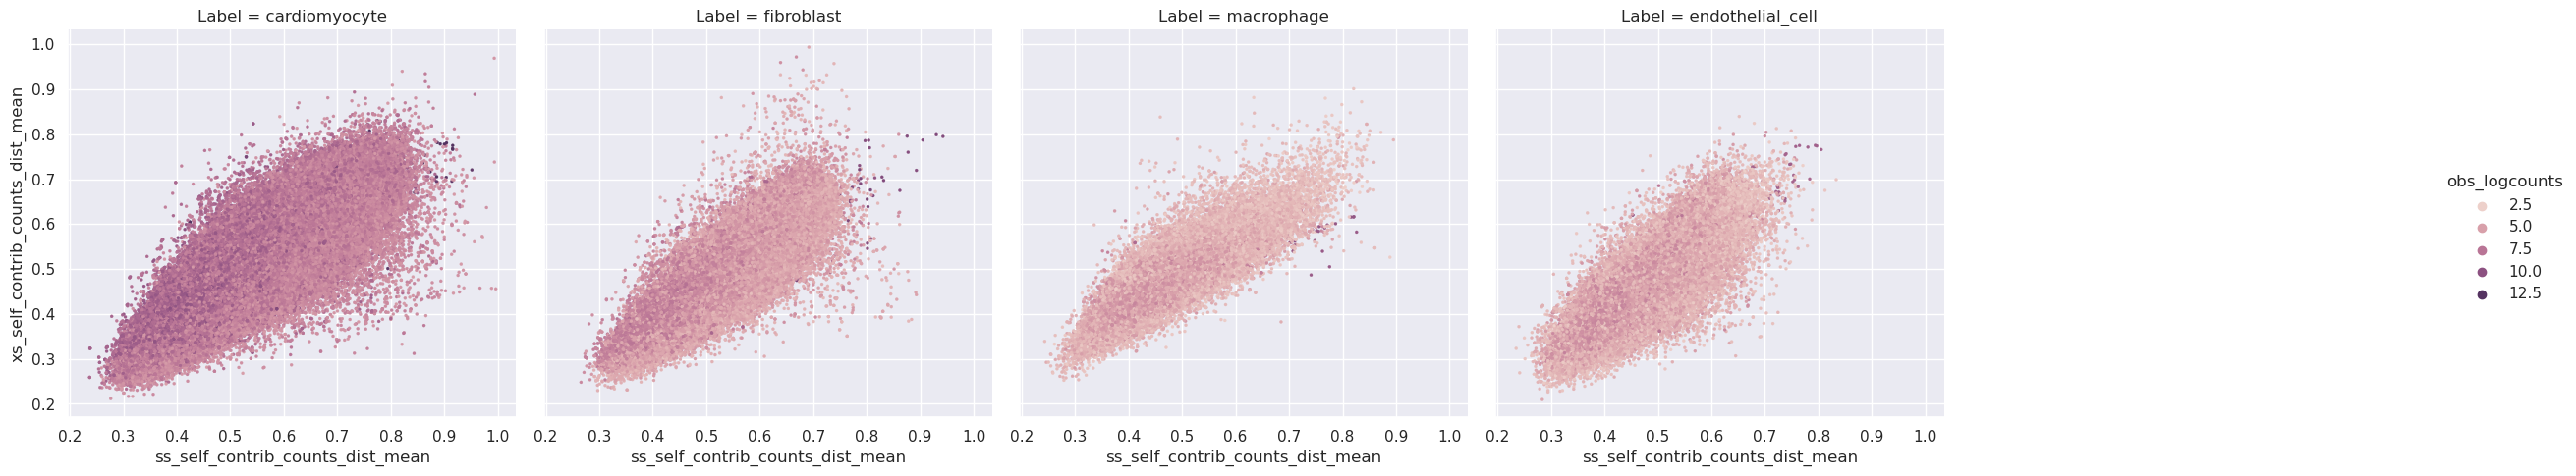

In [20]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="obs_logcounts", col_wrap=5, s=5, edgecolor=None)


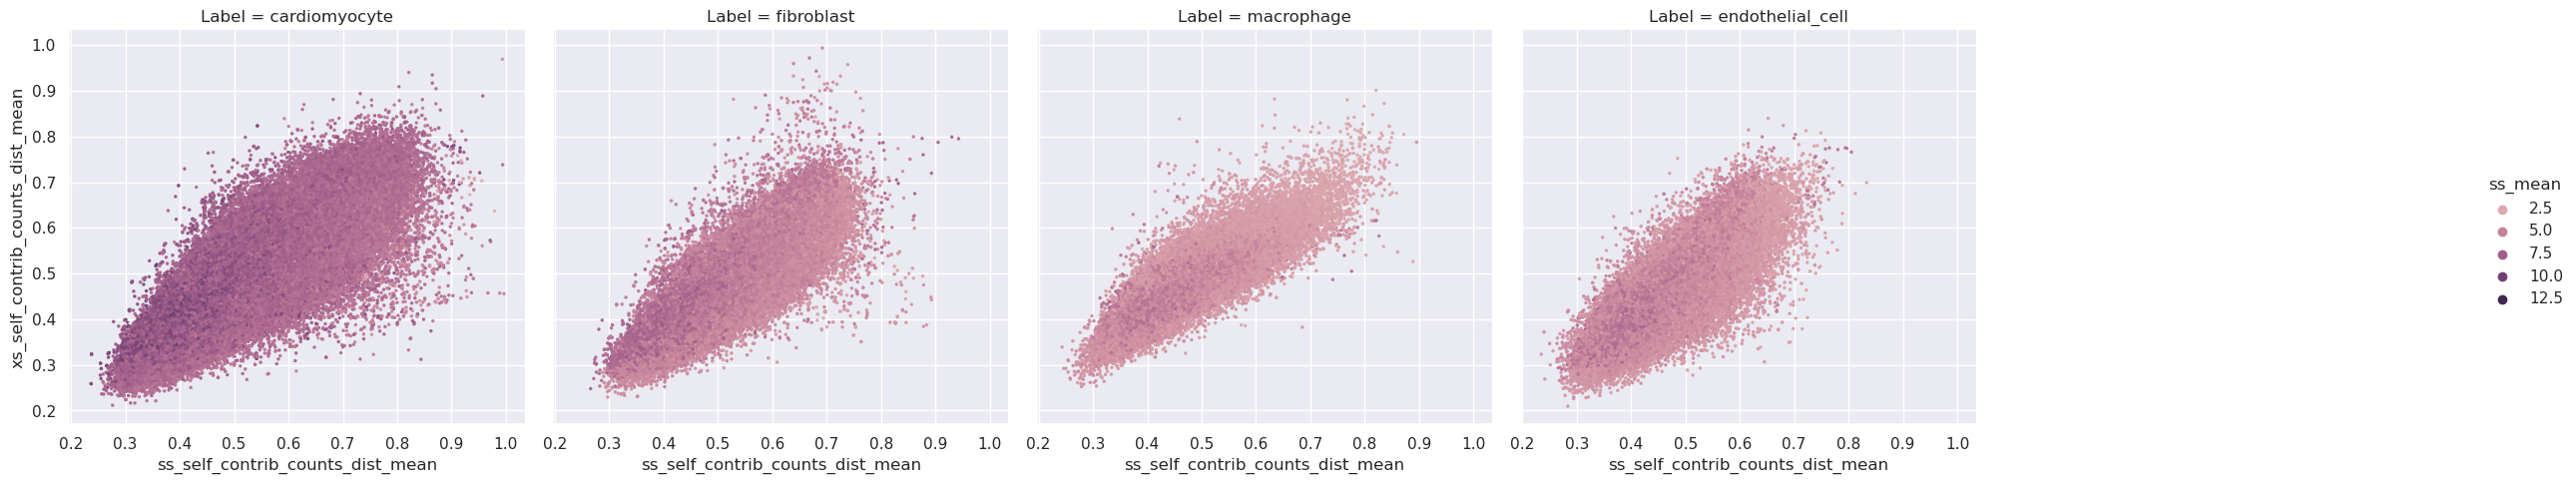

In [21]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="ss_mean", col_wrap=5, s=5, edgecolor=None)


In [ ]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="cross_contrib_counts_dist_mean", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)


In [ ]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)


In [ ]:
from scipy import stats

grouped = data.groupby("Label")
header = ["Label", "SpearmanSame", "SpearmanCross", "SpearmanCrossPooled", "SpearmanObserved"]
records = []
for name, group in grouped:
    fold_0_ss = group[['fold_0_ss']].to_numpy()
    fold_1_ss = group[['fold_1_ss']].to_numpy()
    fold_0_xs = group[['fold_0_xs']].to_numpy()
    ss_mean = group[['ss_mean']].to_numpy()
    xs_mean = group[['xs_mean']].to_numpy()
    observed = group[['obs_logcounts']].to_numpy()
    corr_ss = stats.spearmanr(fold_0_ss, fold_1_ss).correlation
    corr_xs = stats.spearmanr(fold_0_ss, fold_0_xs).correlation
    corr_xs_pooled = stats.spearmanr(ss_mean, xs_mean).correlation
    corr_observed = stats.spearmanr(fold_0_ss, observed).correlation
    records.append([name, corr_ss, corr_xs, corr_xs_pooled, corr_observed])
    
corrs = pd.DataFrame.from_records(records, columns=header)
corrs

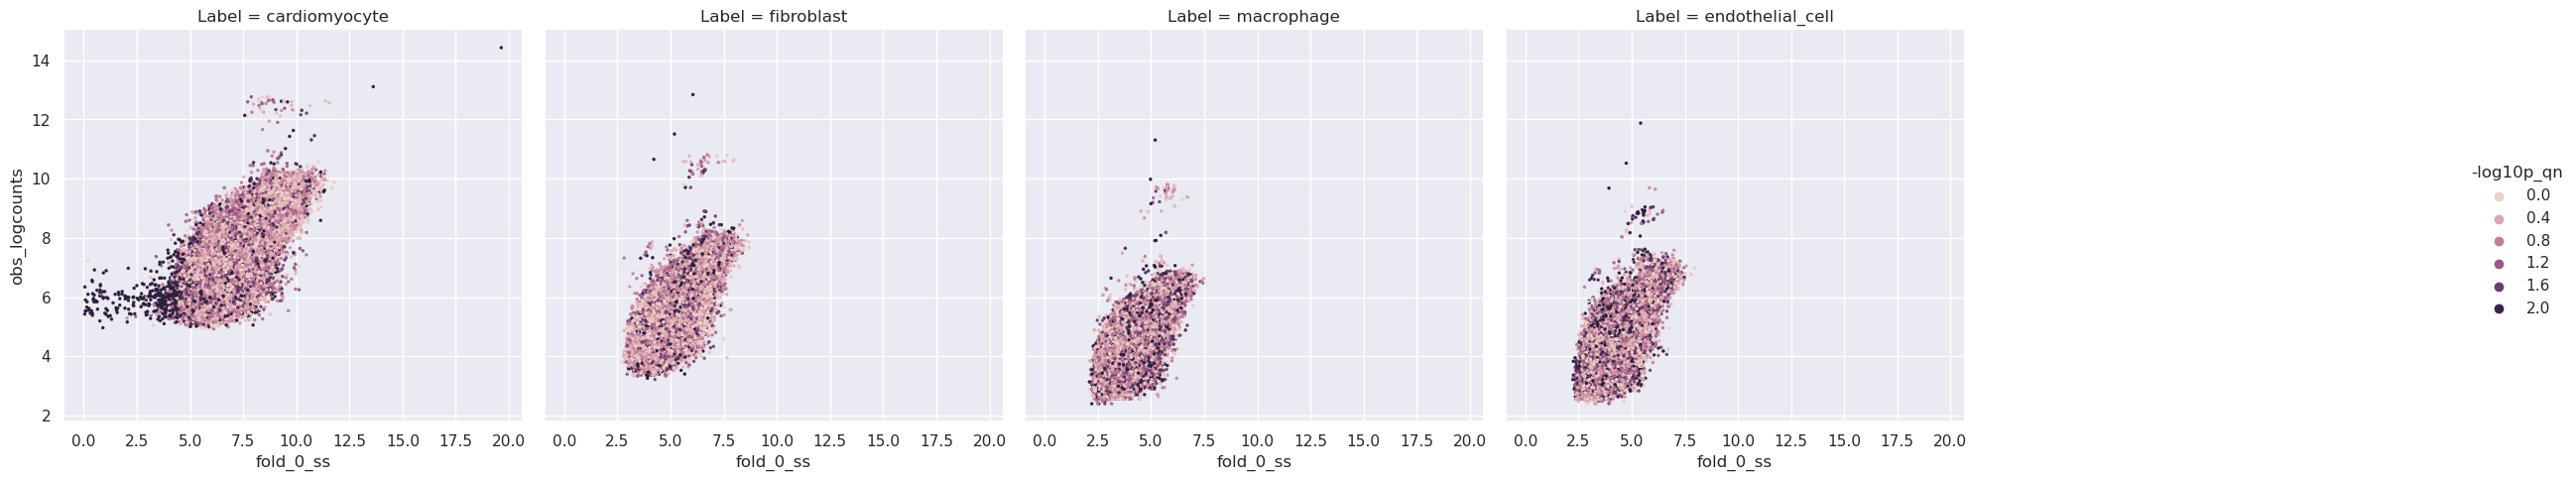

In [25]:
sns.relplot(data=data, x="fold_0_ss", y="obs_logcounts", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. True counts

We look a the fold 0 mouse model predictions compared the true counts on mouse peaks.  

The x axis is the predicted log10 counts as predicted by the mouse model. The y axis is the log1p true counts for the same peaks. Note that these values are on different scales but they are linearly related.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

## Predicted vs. predicted counts

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

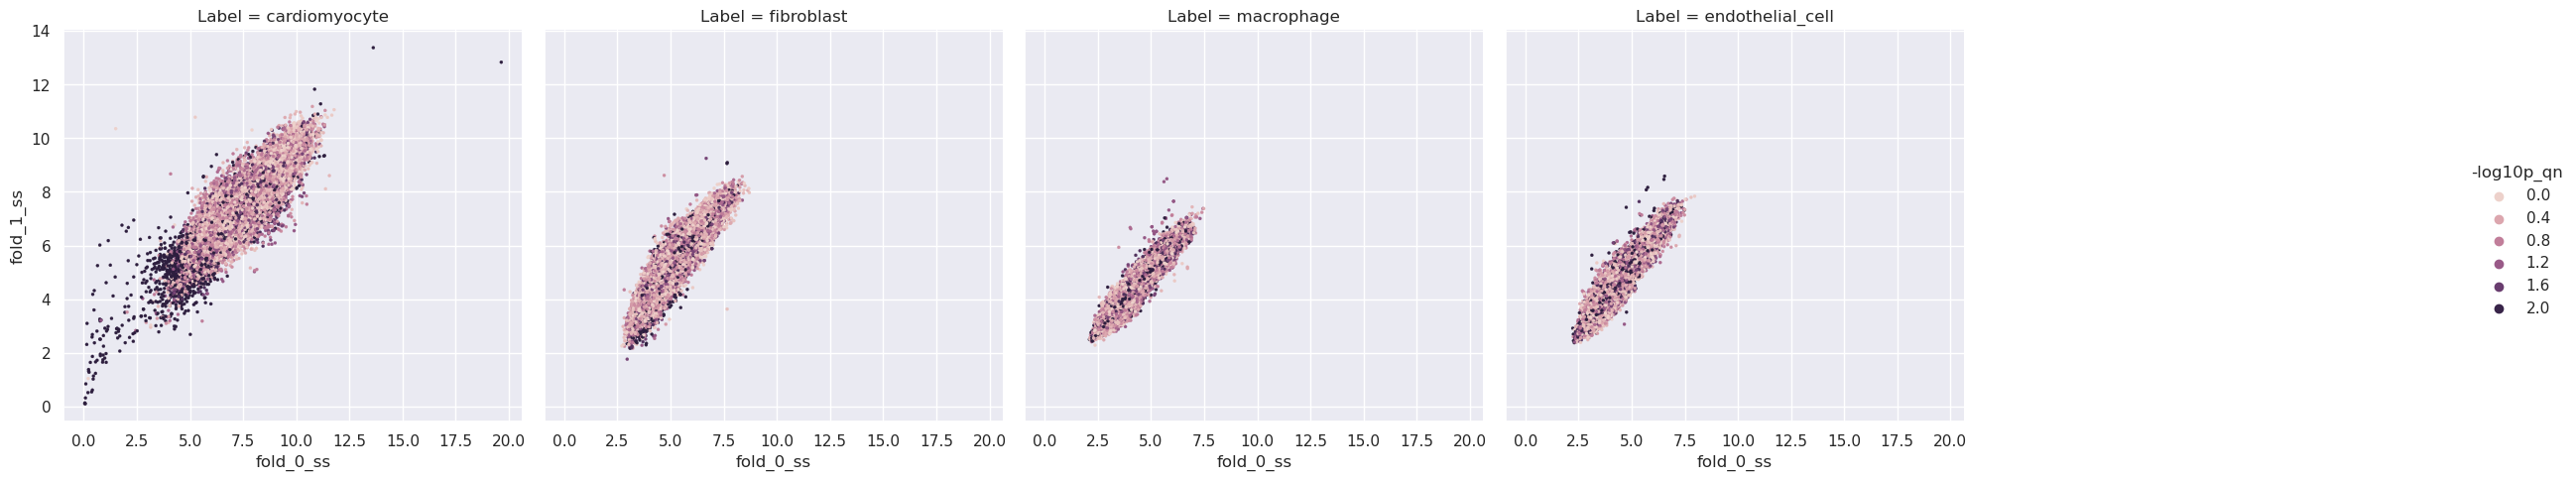

In [26]:
sns.relplot(data=data, x="fold_0_ss", y="fold_1_ss", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted counts

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.

As expected, significantly different peaks tend to be at the edges of the distribution

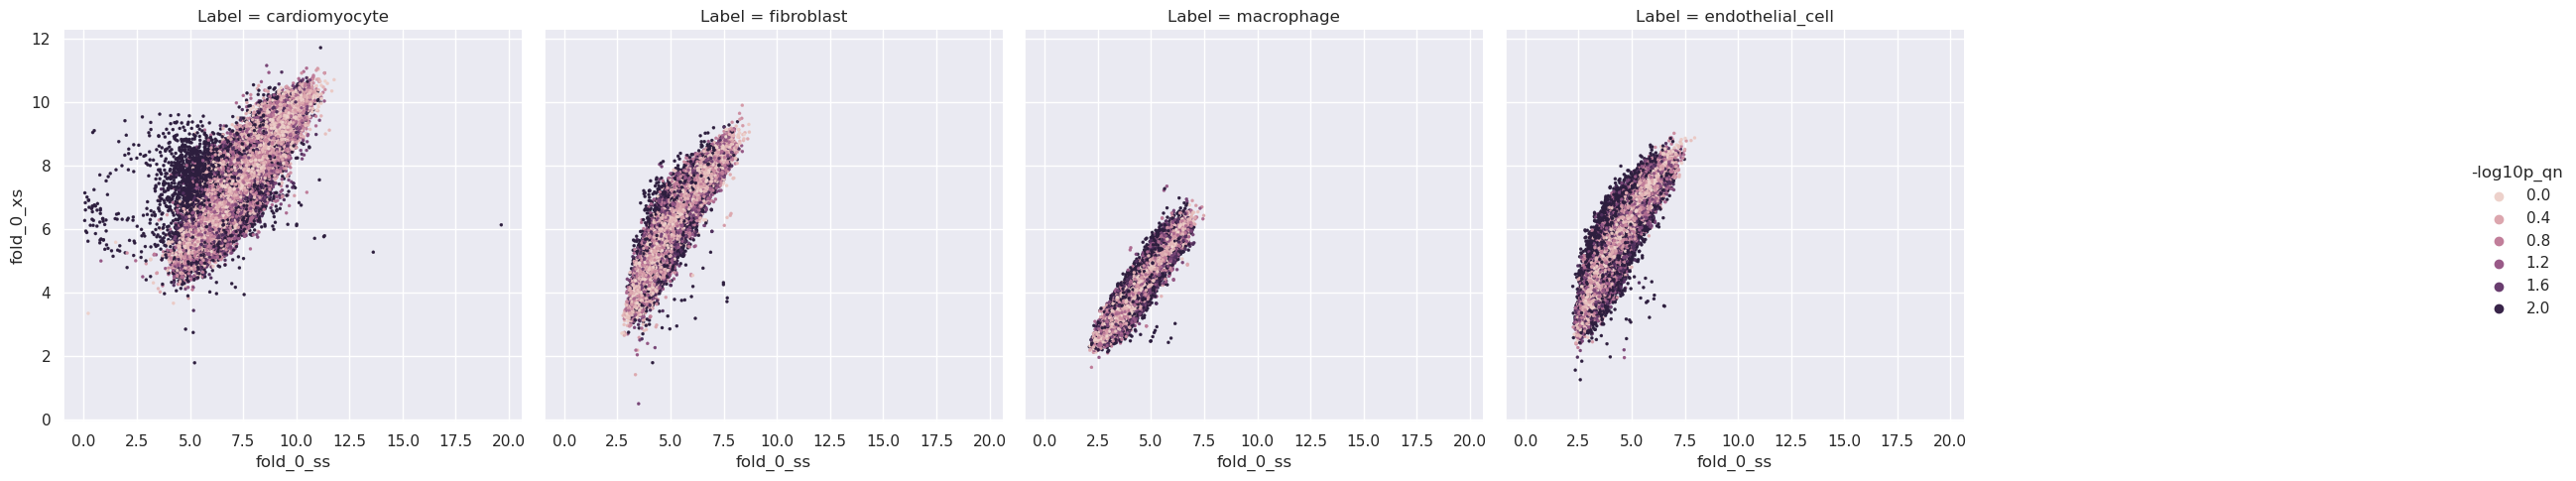

In [27]:
sns.relplot(data=data, x="fold_0_ss", y="fold_0_xs", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Quantitative cross-species prediction performance

Lastly, we look at the predictive cross_species performance for each cell type using spearman correlation across peaks.

SpearmanSame is the correlation of predicted counts from two folds of mouse model. This serves as an upper bound of cross-species predictive performance

SpearmanCross is the correlation of predicted counts from a mouse model with the predicted counts from the corresponding GP model. 

SpearmanObserved is the correlation of observed counts from a mouse model with true observed mouse counts.

We see that SpearmanCross is substantially closer to SpearmanSame than to SpearmanObserved, indicating that the predicted counts between two species correspond much more strongly than the predicted vs. true counts in the same species